In [1]:
import pandas as pd
import polars as pl
import seaborn as sns
import math
from matplotlib import pyplot as plt
import sys
import os

In [2]:
df=pd.read_csv("Zomato Dataset.csv")
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [3]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [4]:
# df["Delivery_person_Age"].fillna(df["Delivery_person_Age"].median(),inplace=True)
# df["Delivery_person_Ratings"].fillna(df["Delivery_person_Ratings"].mean(),inplace=True)
# df["Time_Orderd"].fillna(df["Time_Orderd"].mode()[0],inplace=True)
# df["multiple_deliveries"].fillna(df["multiple_deliveries"].median(),inplace=True)
# df["City"].fillna(df["City"].mode()[0],inplace=True)

In [5]:
# df.dropna(axis=0,inplace=True)

In [6]:
df.shape

(45584, 20)

In [7]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


c:\Users\chavv\anaconda\envs\eda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


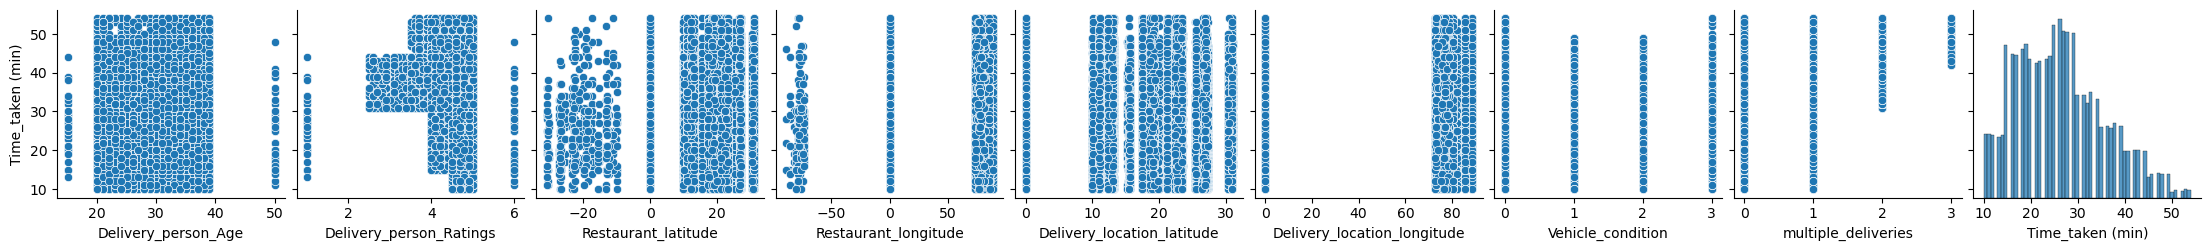

In [8]:
data_filtered = df.drop(["ID", "Delivery_person_ID"], axis=1)

# Create the pairplot with 'Time_taken (min)' as the y-axis variable
sns.pairplot(data_filtered, y_vars=["Time_taken (min)"])
plt.show()

In [4]:
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

In [5]:
df['Distance_km'] = df.apply(lambda row: haversine(row['Restaurant_latitude'], row['Restaurant_longitude'],
                                                   row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [6]:
df = df.drop(["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"],axis=1)

In [7]:
# Function to handle both time in HH:MM format and fractional values in string form
def convert_time_to_minutes(val):
    # If the value is a string and contains a colon, it's in HH:MM format
    if isinstance(val, str) and ":" in val:
        try:
            # Convert time string to minutes (HH * 60 + MM)
            hours, minutes = map(int, val.split(":"))
            return hours * 60 + minutes
        except ValueError:
            return 0  # Return 0 if there's an issue splitting
    elif isinstance(val, str):  # If the value is a string (fractional hours in string form)
        try:
            # Convert fractional hours (string) to float and then multiply by 60
            return float(val) * 60
        except ValueError:
            return 0  # If conversion fails, return 0
    return 0  # For non-string values or invalid inputs

# Apply the conversion function to both columns
df['Time_Orderd_in_minutes'] = df['Time_Orderd'].apply(convert_time_to_minutes)
df['Time_Order_picked_in_minutes'] = df['Time_Order_picked'].apply(convert_time_to_minutes)
df["Time_Differece_in_minutes"]=df['Time_Order_picked_in_minutes']-df['Time_Orderd_in_minutes']

In [8]:
df.drop(["Time_Orderd","Time_Order_picked"],inplace=True,axis=1)

In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.drop(["ID", "Delivery_person_ID"], axis=1).columns if df[col].dtype in ['int64', 'float64']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Delivery_person_ID", axis=1),  df[["ID"]], test_size=0.3, 
                                                    random_state=42, 
                                                    shuffle=True)

train_data = X_train.merge(y_train, on="ID")
test_data = X_test.merge(y_test, on="ID")
train_data.shape, test_data.shape

((31908, 17), (13676, 17))

In [11]:
num_cols

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'Distance_km',
 'Time_Orderd_in_minutes',
 'Time_Order_picked_in_minutes',
 'Time_Differece_in_minutes']

In [12]:
train_data=train_data.drop(["Order_Date","Time_Orderd_in_minutes","Time_Order_picked_in_minutes"],axis=1)
test_data=test_data.drop(["Order_Date","Time_Orderd_in_minutes","Time_Order_picked_in_minutes"],axis=1)
cat_cols.remove("Order_Date")
num_cols.remove("Time_Orderd_in_minutes")
num_cols.remove("Time_Order_picked_in_minutes")

In [13]:
cat_cols = [col for col in train_data.drop(["ID"],axis=1).columns if df[col].dtype == 'object']
num_cols = [col for col in train_data.drop(['Time_Differece_in_minutes'],axis=1).columns if df[col].dtype in ['int64', 'float64']]

In [14]:
num_cols,cat_cols

(['Delivery_person_Age',
  'Delivery_person_Ratings',
  'Vehicle_condition',
  'multiple_deliveries',
  'Time_taken (min)',
  'Distance_km'],
 ['Weather_conditions',
  'Road_traffic_density',
  'Type_of_order',
  'Type_of_vehicle',
  'Festival',
  'City'])

In [19]:
# categorical_box_plot(train_data,cat_cols,"Time_taken (min)")

In [20]:
train_data[cat_cols]

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,Windy,Medium,Drinks,scooter,No,Metropolitian
1,Sandstorms,High,Buffet,motorcycle,No,Metropolitian
2,Stormy,Low,Drinks,electric_scooter,No,Urban
3,Stormy,Medium,Drinks,motorcycle,No,Metropolitian
4,Cloudy,Jam,Snack,motorcycle,No,Metropolitian
...,...,...,...,...,...,...
31903,Sunny,Low,Drinks,scooter,No,Metropolitian
31904,Sunny,Low,Drinks,motorcycle,No,Metropolitian
31905,Windy,Low,Meal,motorcycle,No,Metropolitian
31906,Stormy,Medium,Buffet,motorcycle,No,Metropolitian


<Axes: >

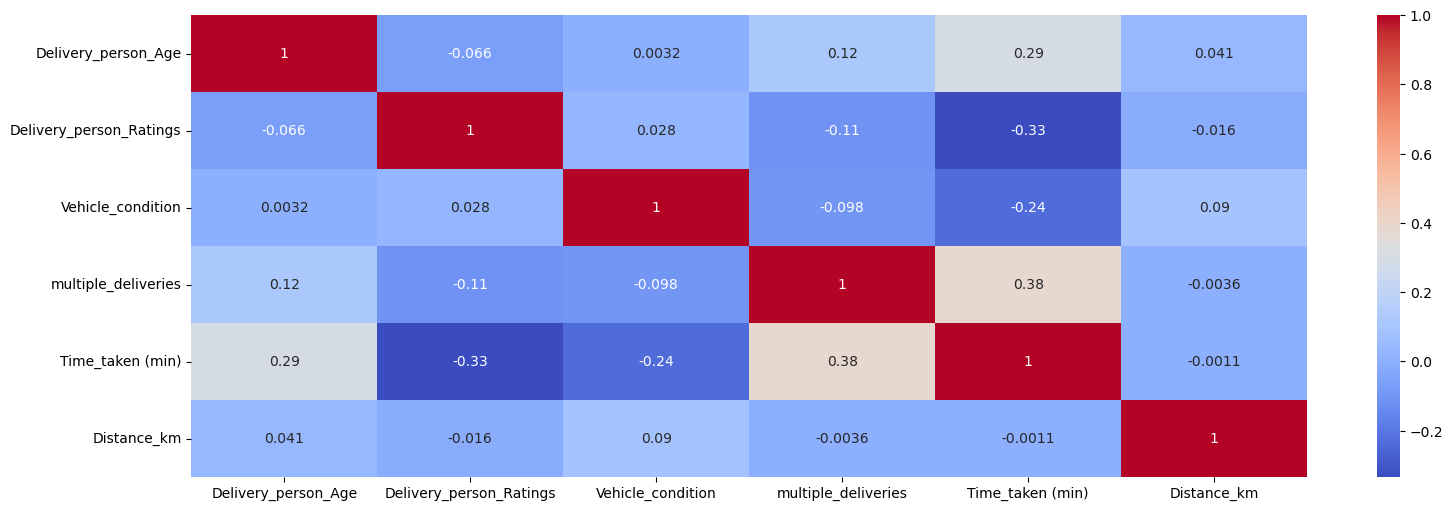

In [21]:
plt.figure(figsize=(18,6))
sns.heatmap(train_data[num_cols].corr(),annot=True,cmap="coolwarm",robust=True)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

imputer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='infrequent_if_exist',drop='first'), cat_cols),
    ('num', num_transformer, num_cols)
],remainder="passthrough")
pipe = Pipeline(steps=[
    ('imputer', imputer),
    ("lr",LinearRegression())
])
pipe2= Pipeline(steps=[
    ('imputer', imputer),
    ('Lasso', Lasso(alpha=1.0)) 
])
pipe2

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  ['Weather_conditions',
                                                   'Road_traffic_density',
                                                   'Type_of_order',
                                                   'Type_of_vehicle',
                                                   'Festival', 'City']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Delivery_person_Age',
                                                   'Delivery_person_Ratings',
                                                   'Vehicle_condition',
                                                   'multiple_deliveries',
                                                   'Time_taken (min)',
                                                   'Distance_km'])])),
                ('Lasso', Lasso())])

In [23]:
X_train

,ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance_km,Time_Orderd_in_minutes,Time_Order_picked_in_minutes,Time_Differece_in_minutes
32032,0x5533,35.0,4.6,20-03-2022,Windy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,26,11.007735,1035.0,1050.0,15.0
1953,0xfe5,38.0,4.7,05-03-2022,Sandstorms,High,2,Buffet,motorcycle,1.0,No,Metropolitian,29,6.037116,810.0,820.0,10.0
5729,0x190e,36.0,4.8,08-03-2022,Stormy,Low,2,Drinks,electric_scooter,0.0,No,Urban,17,19.976028,1355.0,1360.0,5.0
41624,0xab78,27.0,5.0,19-03-2022,Stormy,Medium,2,Drinks,motorcycle,0.0,No,Metropolitian,24,6.051109,995.0,1000.0,5.0
40690,0xcd9c,38.0,4.7,18-02-2022,Cloudy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,46,13.622111,1250.0,1255.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0x7f61,28.0,4.9,30-03-2022,Sunny,Low,2,Drinks,scooter,1.0,No,Metropolitian,22,3.145067,620.0,630.0,10.0
44732,0xb217,29.0,4.9,30-03-2022,Sunny,Low,2,Drinks,motorcycle,1.0,No,Metropolitian,20,4.560965,1365.0,57.5,-1307.5
38158,0x91b2,24.0,4.3,05-03-2022,Windy,Low,0,Meal,motorcycle,0.0,No,Metropolitian,15,7.660520,1345.0,1355.0,10.0
860,0x1a29,27.0,4.4,27-03-2022,Stormy,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,33,10.707860,1050.0,1055.0,5.0


In [50]:
train_data

,ID,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance_km,Time_Differece_in_minutes
0,0x5533,35.0,4.6,Windy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,26,11.007735,15.0
1,0xfe5,38.0,4.7,Sandstorms,High,2,Buffet,motorcycle,1.0,No,Metropolitian,29,6.037116,10.0
2,0x190e,36.0,4.8,Stormy,Low,2,Drinks,electric_scooter,0.0,No,Urban,17,19.976028,5.0
3,0xab78,27.0,5.0,Stormy,Medium,2,Drinks,motorcycle,0.0,No,Metropolitian,24,6.051109,5.0
4,0xcd9c,38.0,4.7,Cloudy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,46,13.622111,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31903,0x7f61,28.0,4.9,Sunny,Low,2,Drinks,scooter,1.0,No,Metropolitian,22,3.145067,10.0
31904,0xb217,29.0,4.9,Sunny,Low,2,Drinks,motorcycle,1.0,No,Metropolitian,20,4.560965,-1307.5
31905,0x91b2,24.0,4.3,Windy,Low,0,Meal,motorcycle,0.0,No,Metropolitian,15,7.660520,10.0
31906,0x1a29,27.0,4.4,Stormy,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,33,10.707860,5.0


In [52]:
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error,r2_score
import statsmodels.api as sm

X_train=train_data.drop(["ID", "Time_Differece_in_minutes"],axis=1)
y_train=train_data["Time_taken (min)"]
X_test=test_data.drop(["ID", "Time_Differece_in_minutes"],axis=1)
y_test=test_data["Time_taken (min)"]

rkf=RepeatedKFold(n_splits=10,random_state=42)
cv_results = cross_validate(pipe2, X_train,y_train, cv=rkf, scoring='r2',return_train_score=True)
print(f'Mean Train Score: {cv_results["train_score"].mean()}')
print(f'Standard Deviation of Train Scores: {cv_results["train_score"].std()}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')

Mean Train Score: 0.9885738505672663
Standard Deviation of Train Scores: 2.681559245083946e-05
Mean Test Score: 0.9885697142763321
Standard Deviation of Test Scores: 2.7690410013971604e-05


Mean absolute Error: 1.7855399652079133e-14
R-squared on holdout set: 1.0
Adjusted R-squared on holdout set: 1.0


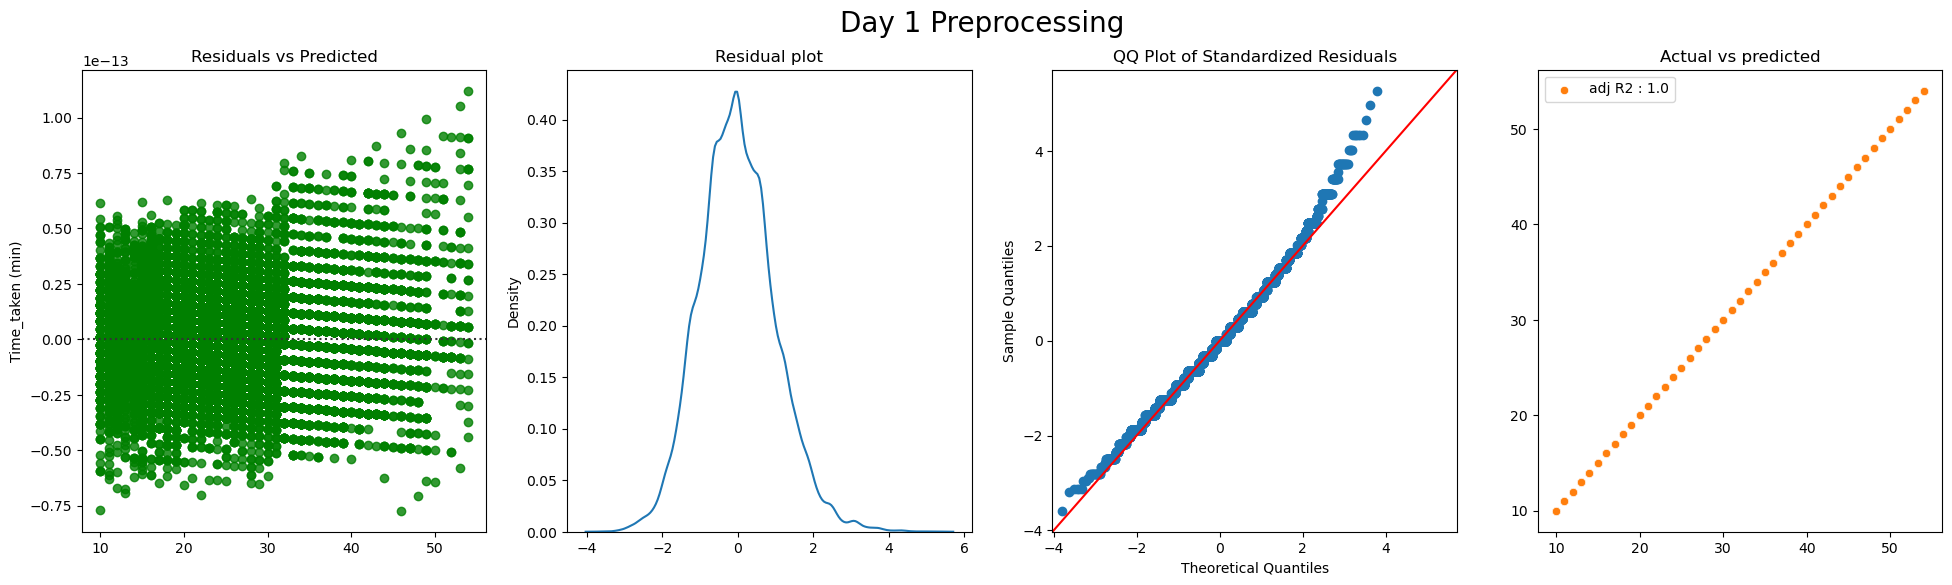

In [54]:
sc=StandardScaler()
predictions = cross_val_predict(pipe, X_test, y_test)
residuals = y_test - predictions
std_residuals = sc.fit_transform(residuals.values.reshape(-1, 1))
std_residuals = std_residuals.flatten()
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_true=y_test,y_pred= predictions)
n,p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean absolute Error: {mae}')
print(f'R-squared on holdout set: {r2}')
print(f'Adjusted R-squared on holdout set: {adjusted_r2}')

fig,[ax1,ax2,ax3,ax4] = plt.subplots(ncols=4,figsize=(24,6))
sns.residplot(x=predictions, y=residuals, color='g',ax=ax1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(std_residuals,ax=ax2)
ax2.set_title("Residual plot")
# QQ plot
sm.qqplot(std_residuals, line='45', ax=ax3)
ax3.set_title('QQ Plot of Standardized Residuals')
sns.scatterplot(x=y_test,y=y_test,ax=ax4)
sns.scatterplot(x=y_test,y=predictions,ax=ax4,label=f"adj R2 : {adjusted_r2.round(3)}")
ax4.set_title("Actual vs predicted")
ax4.set_xlabel("")
ax4.set_ylabel("")
plt.suptitle("Day 1 Preprocessing",fontsize=20)
plt.show()